In [1]:
import pandas as pd
import numpy as np
import os
import json
import pandas_datareader.data as web   # my local kernel Python 3.10.7 
import matplotlib.pyplot as plt  # unavailable?  do: 1. pip uninstall matplotlib # 2. python3 -m pip install matplotlib
%matplotlib inline
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import datetime
import io
pd.set_option('display.max_columns', None)
# import warnings
import seaborn as sns
import scipy
from scipy import stats
# warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import talib as ta
import scipy
from scipy import stats
import mplfinance as mpf
# from library.sb_utils import save_file
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pd.set_option('display.max_rows', 30) 
pd.set_option('display.max_columns', 50)  # Display up to 50 columns
pd.set_option('display.max_colwidth',100)  # Display up to 100 characters per column value

# !pip install plotly
import plotly

In [256]:

esD = pd.read_pickle(r"C:\Users\tonya\Desktop\SpringBoardAssignments\Capstone3_no_1\ES_D.pkl")
# print(esD)
esD['TypeOfDay'] = 'Down'
# esD.columns
esD['vwapBA'] = np.log(esD['vwapBA'])
esD['vwapBA'] = esD['vwapBA'].fillna(method='ffill') 
esD.shape #(8784, 25)

c:\Users\tonya\anaconda3\envs\quantra_py\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(8784, 24)

In [257]:
esD['TypeOfDay'].describe()

count     8784
unique       1
top       Down
freq      8784
Name: TypeOfDay, dtype: object

In [259]:
esD.describe()
esD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2022-09-27 04:20:00 to 2023-03-09 16:30:00
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Vol         8784 non-null   float64
 1   BidAsk      8784 non-null   float64
 2   open        8784 non-null   float64
 3   high        8784 non-null   float64
 4   low         8784 non-null   float64
 5   close       8784 non-null   float64
 6   vari        8784 non-null   float64
 7   volat       8784 non-null   float64
 8   taly        8784 non-null   float64
 9   diff        8784 non-null   float64
 10  pct_chng    8784 non-null   float64
 11  fut_10      8784 non-null   float64
 12  fut_5       8784 non-null   float64
 13  volatility  8784 non-null   float64
 14  BA_2m       8784 non-null   float64
 15  BA_5m       8784 non-null   float64
 16  BA_10m      8784 non-null   float64
 17  BA_cs       8784 non-null   float64
 18  BAr_V       8784 non-null   floa

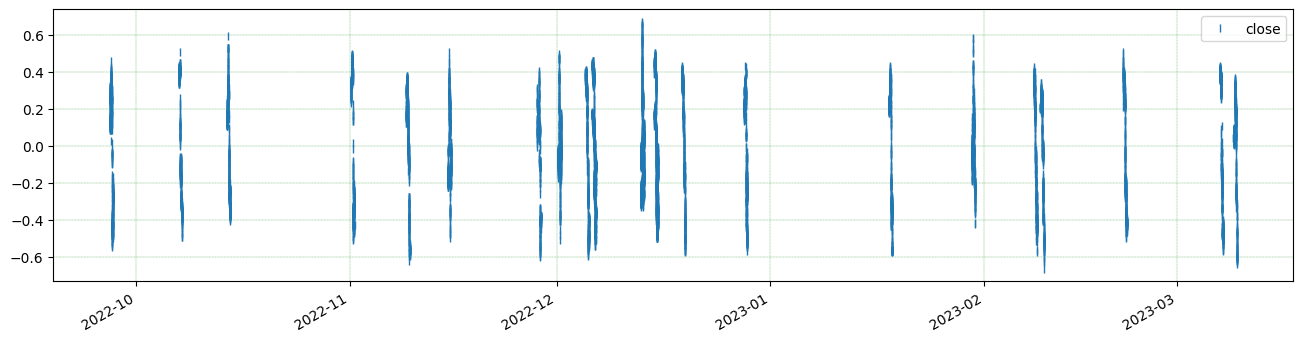

In [214]:
esD.plot( y=['close' ], figsize=(16,4), marker='|',  linestyle='none', linewidth= 0.3)   
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()

In [263]:
esU = pd.read_pickle(r"C:\Users\tonya\Desktop\SpringBoardAssignments\Capstone3_no_1\ES_U.pkl")
esU.head()
type(esU.index)   # pandas.core.indexes.datetimes.DatetimeIndex
esU['TypeOfDay'] = 'Up'
esU.columns
esU.shape  #(10234, 24)

(10234, 24)

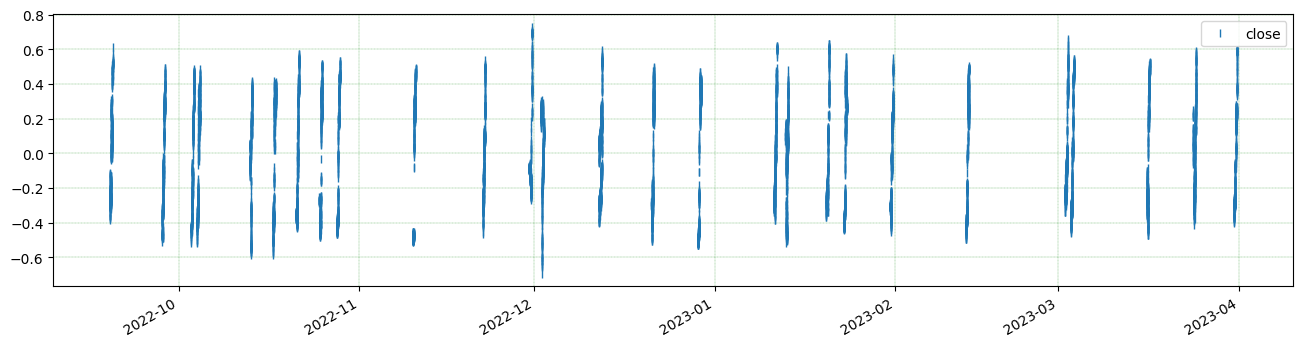

In [264]:
esU.plot( y=['close'], figsize=(16,4), marker='|',  linestyle='none', linewidth= 0.3)   
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()

#### Combine 2 types of days into 1 df

In [350]:
# es_all['Date'] = es_all.index
# data = es_all.set_index(['TypeOfDay','Date'])
data.sort_index()
data.sample(5)

ValueError: a must be greater than 0 unless no samples are taken

In [351]:
# es_all = pd.concat([esU, esD], ignore_index=False, sort=True)
# es_all.index = pd.to_datetime(es_all.index)
# es_all.sort_index(inplace=True)
es_all.columns    #  'TypeOfDay'
# es_all.shape   #(19018, 25)
# es_all.dropna(inplace= True, axis=0)
# es_all.shape #   (19018, 25)
# es_all.sample(10)
# es_all.head()

Index(['BA_10m', 'BA_2m', 'BA_5m', 'BA_cs', 'BAr_V', 'BidAsk', 'Date', 'OBV',
       'TypeOfDay', 'Vol', 'close', 'diff', 'fut_10', 'fut_5', 'high', 'low',
       'obBA', 'open', 'pct_chng', 'taly', 'vari', 'volat', 'volatility',
       'vwap', 'vwapBA'],
      dtype='object')

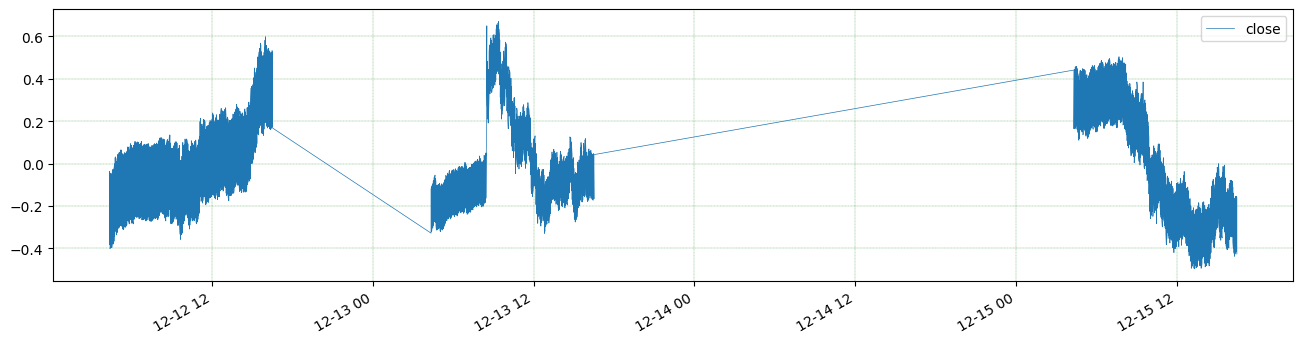

In [354]:
# es_all.shape   #  (19018, 24)
es_all['2022-12-11':'2022-12-17'].plot( y=['close' ], figsize=(16,4),  linewidth= 0.5)   
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()

In [329]:
es_all.columns

Index(['Vol', 'BidAsk', 'open', 'high', 'low', 'close', 'vari', 'volat',
       'taly', 'diff', 'pct_chng', 'fut_10', 'fut_5', 'volatility', 'BA_2m',
       'BA_5m', 'BA_10m', 'BA_cs', 'BAr_V', 'vwap', 'vwapBA', 'OBV', 'obBA',
       'TypeOfDay', 'Date'],
      dtype='object')

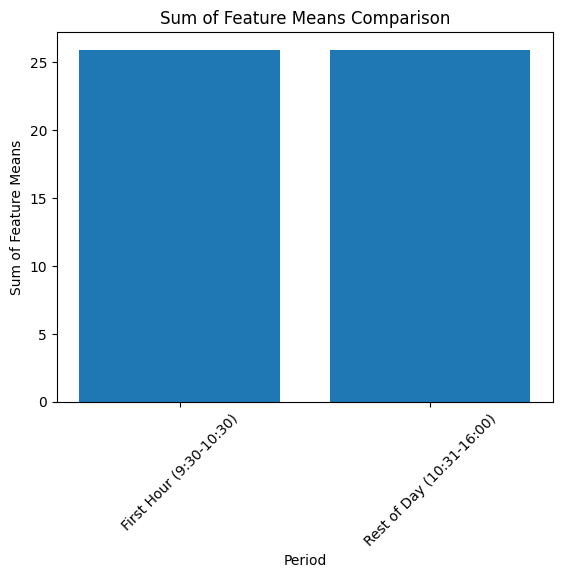

In [274]:
# Create a bar plot
labels = ['First Hour (9:30-10:30)', 'Rest of Day (10:31-16:00)']
values = [first_hour_sum, rest_of_day_sum]
plt.bar(labels, values)

# Customize the plot
plt.title('Sum of Feature Means Comparison')
plt.ylabel('Sum of Feature Means')
plt.xlabel('Period')
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [355]:
es_all.columns

Index(['BA_10m', 'BA_2m', 'BA_5m', 'BA_cs', 'BAr_V', 'BidAsk', 'Date', 'OBV',
       'TypeOfDay', 'Vol', 'close', 'diff', 'fut_10', 'fut_5', 'high', 'low',
       'obBA', 'open', 'pct_chng', 'taly', 'vari', 'volat', 'volatility',
       'vwap', 'vwapBA'],
      dtype='object')

In [358]:
es_all.sample(10)

,BA_10m,BA_2m,BA_5m,BA_cs,BAr_V,BidAsk,Date,OBV,TypeOfDay,Vol,close,diff,fut_10,fut_5,high,low,obBA,open,pct_chng,taly,vari,volat,volatility,vwap,vwapBA
2022-11-15 04:56:00,-0.003576,-0.004133,-0.012276,-0.372093,0.117882,0.003594,2022-11-15 04:56:00,-0.012590,Down,-0.124748,-0.184557,-0.002663,0.072583,0.045729,-0.196951,-0.159320,-0.378695,-0.181362,-0.002672,-0.120726,-0.006655,-0.093714,-0.017694,-0.373395,-1.509691
2022-10-28 15:04:00,-0.143060,-0.075313,-0.049140,0.417057,-0.021992,-0.110769,2022-10-28 15:04:00,0.332158,Up,0.020605,0.419581,-0.048562,0.016749,0.018290,0.440111,0.429963,0.469564,0.451054,-0.047683,0.028402,-0.132073,0.021192,-0.002723,-0.098141,-0.125322
2022-12-12 15:58:00,-0.356539,-0.520267,-0.348905,0.494665,-0.681854,-0.482489,2022-12-12 15:58:00,0.501856,Up,0.611366,0.235620,0.010977,-0.035162,-0.038584,0.229295,0.227309,0.499604,0.220887,0.011143,0.668139,0.115045,0.069262,-0.006511,-0.428218,-0.081297
2022-09-28 06:18:00,0.362414,0.329571,0.264289,-0.271538,0.036481,0.218319,2022-09-28 06:18:00,-0.221645,Up,-0.008415,-0.171775,0.042343,0.001267,-0.022785,-0.190293,-0.263584,-0.346368,-0.257952,0.045128,-0.021878,0.400166,0.413978,0.023185,0.368755,-0.045990
2022-11-09 06:58:00,-0.006048,-0.023720,0.004961,0.289937,0.066546,-0.004559,2022-11-09 06:58:00,0.178706,Down,-0.069165,0.329560,0.056732,-0.041047,-0.021551,0.314971,0.319853,-0.337271,0.302066,0.057073,-0.067378,0.121053,-0.103706,0.036606,0.297026,-2.168276
2022-11-10 14:46:00,-0.009240,0.075789,0.013421,0.345501,0.035140,-0.002794,2022-11-10 14:46:00,0.199074,Up,-0.032921,0.301539,-0.002573,0.037827,0.021927,0.300963,0.301547,0.422621,0.306882,-0.002581,-0.032415,-0.011029,-0.019854,-0.001992,0.260286,-0.071798
2022-12-29 06:30:00,-0.033721,0.014457,0.003676,0.037923,0.041240,0.012413,2022-12-29 06:30:00,-0.378859,Up,-0.042558,-0.442374,0.001164,-0.046599,-0.040456,-0.448762,-0.431967,-0.362897,-0.434761,0.001136,-0.042408,-0.032969,-0.201332,-0.018468,0.402623,0.428391
2022-11-28 11:02:00,-0.342451,0.072651,0.057504,-0.096492,-0.016962,-0.042581,2022-11-28 11:02:00,0.049340,Down,0.014166,0.050989,-0.078186,-0.007684,-0.003793,0.068330,0.068500,0.046111,0.086369,-0.078180,0.017109,-0.089907,0.014166,0.157657,0.048194,-4.073196
2022-11-30 11:46:00,-0.060526,-0.070775,-0.120867,-0.115149,0.012982,-0.039150,2022-11-30 11:46:00,-0.084766,Up,-0.018765,-0.146943,-0.015953,-0.131943,-0.071585,-0.152052,-0.141707,0.021297,-0.144935,-0.016006,-0.017750,-0.026718,-0.045028,-0.034993,-0.040200,-0.082255
2023-03-03 06:42:00,-0.028735,-0.002709,-0.005399,-0.208717,0.054207,-0.010962,2023-03-03 06:42:00,-0.127902,Up,-0.055277,-0.283935,0.072131,0.023188,0.000354,-0.299806,-0.288822,-0.368212,-0.295480,0.072224,-0.053571,0.059643,-0.093137,-0.042864,-0.272684,0.210361
